In [2]:
# Problema classificar se uma pessoa comprará ou não um produto baseado em sua idade, renda e sexo.

# Importando as bibliotecas necessárias
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/danielvieira95/Inteligencia_Artificial_2025/refs/heads/main/bases_de_dados/Social_Network_Ads.csv')

In [4]:
# Exibe as pirmeiras linhas do DataFrame
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
# Criando um dicionário para substituir o nome de cada coluna
dicionario = {
    'User ID': 'Usuario', 'Gender':'Genero', 'Age':'Idade', 'EstimatedSalary':'Salario_Estimado', 'Purchased':'Comprou'
}

In [6]:
df.rename(columns=dicionario, inplace=True) # renomeia a coluna

In [7]:
df.head()

,Usuario,Genero,Idade,Salario_Estimado,Comprou
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
# importa as biblotecas necessárias para análise de dados
import matplotlib.pyplot as plt # importa a biblioteca matplotlib
from sklearn.svm import SVC # importa da biblioteca SVM o modelo SVC
from sklearn.preprocessing import StandardScaler # faz a normalização dos dados
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from matplotlib.colors import ListedColormap # importa a biblioteca matplotlib

In [9]:
# Seleciona as colunas do dataframe
X =df.iloc[:, [2, 3]].values # pega os valores da primeira coluna ate a coluna 3
Y = df.iloc[:,-1].values # pega a ultima coluna do dataframe

In [10]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [11]:
Y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [12]:
# importa as bibliotecas para dividir os dados em treino e teste
from sklearn.model_selection import train_test_split # importa o metodo train teste split

In [13]:
# dividindo os dados em treino e teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.3, random_state=3)

In [14]:
# normalizando os dados com standscaler
sc = StandardScaler() # armazena  o StandScaler na variavel sc

In [15]:
# normalizando dados X_treino e X_teste
X_treino = sc.fit_transform(X_treino)
X_teste = sc.transform(X_teste)

In [16]:
# criando o algoritimo de ML - Machine Learning SVM
algoritimo = SVC(kernel='linear', random_state=3) 

In [17]:
# treinando o algoritimo machine learning  SVM
algoritimo.fit(X_treino,Y_treino)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [19]:
# realizando previsoes
y_prev=algoritimo.predict(X_teste)

In [20]:
y_prev

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [21]:
# exibindo o X_teste
X_teste

array([[ 0.76506273,  0.1251659 ],
       [ 0.85844441, -1.34008676],
       [ 1.97902452, -1.2204743 ],
       [-1.66286085, -0.62241199],
       [-1.00918911,  0.57371263],
       [ 0.20477268,  0.24477836],
       [ 1.23197111, -1.39989299],
       [-1.38271582, -0.65231511],
       [ 0.57829938, -0.92144315],
       [-1.00918911, -1.57931169],
       [ 0.29815435, -0.29347772],
       [ 0.111391  , -0.8317338 ],
       [ 0.76506273,  0.54380952],
       [-0.2621357 , -0.50279953],
       [-1.10257079, -1.13076495],
       [-1.28933414, -1.51950546],
       [-0.72904409, -0.62241199],
       [-1.28933414,  0.42419705],
       [-0.07537235,  2.00906218],
       [ 0.20477268, -0.29347772],
       [-0.54228073,  0.48400328],
       [-0.35551738, -1.34008676],
       [-0.82242576,  0.30458459],
       [ 0.39153603, -0.14396214],
       [-0.44889906,  1.2913874 ],
       [-0.63566241, -0.35328395],
       [ 0.39153603, -0.47289641],
       [ 1.32535279,  2.39780268],
       [ 0.29815435,

In [22]:
# aplicando a transformada inversa nos dados
X_teste_padrao=sc.inverse_transform(X_teste)

In [23]:
# exibindo o X_teste_padrao
X_teste_padrao

array([[4.60e+01, 7.40e+04],
       [4.70e+01, 2.50e+04],
       [5.90e+01, 2.90e+04],
       [2.00e+01, 4.90e+04],
       [2.70e+01, 8.90e+04],
       [4.00e+01, 7.80e+04],
       [5.10e+01, 2.30e+04],
       [2.30e+01, 4.80e+04],
       [4.40e+01, 3.90e+04],
       [2.70e+01, 1.70e+04],
       [4.10e+01, 6.00e+04],
       [3.90e+01, 4.20e+04],
       [4.60e+01, 8.80e+04],
       [3.50e+01, 5.30e+04],
       [2.60e+01, 3.20e+04],
       [2.40e+01, 1.90e+04],
       [3.00e+01, 4.90e+04],
       [2.40e+01, 8.40e+04],
       [3.70e+01, 1.37e+05],
       [4.00e+01, 6.00e+04],
       [3.20e+01, 8.60e+04],
       [3.40e+01, 2.50e+04],
       [2.90e+01, 8.00e+04],
       [4.20e+01, 6.50e+04],
       [3.30e+01, 1.13e+05],
       [3.10e+01, 5.80e+04],
       [4.20e+01, 5.40e+04],
       [5.20e+01, 1.50e+05],
       [4.10e+01, 7.90e+04],
       [4.60e+01, 2.30e+04],
       [4.40e+01, 1.39e+05],
       [2.80e+01, 3.20e+04],
       [4.20e+01, 1.04e+05],
       [4.60e+01, 9.60e+04],
       [3.50e+

In [24]:
# Gerando a matriz da confusão
cm = confusion_matrix(Y_teste, y_prev)
cm

array([[73,  5],
       [16, 26]])

In [25]:
# Calculando as metricas
acc = accuracy_score(Y_teste,y_prev)
# acc = (VP + VN) /(VP+VN+FP+FN)
acc

0.825

In [26]:
# Precisão
# prec = VP / VP+ FP
prec = precision_score(Y_teste,y_prev)
prec

0.8387096774193549

In [27]:
# Metrica Recall
# recal = VP / VP+ FN
recall = recall_score(Y_teste,y_prev)
recall

0.6190476190476191

In [28]:
#Metrica F1_score
#F1score= 2*precision *recall/(precision*recall)
f1score= f1_score(Y_teste,y_prev)
f1score

0.7123287671232876

In [29]:
# importando a seaborn
import seaborn as sns

Text(70.72222222222221, 0.5, 'Previsão')

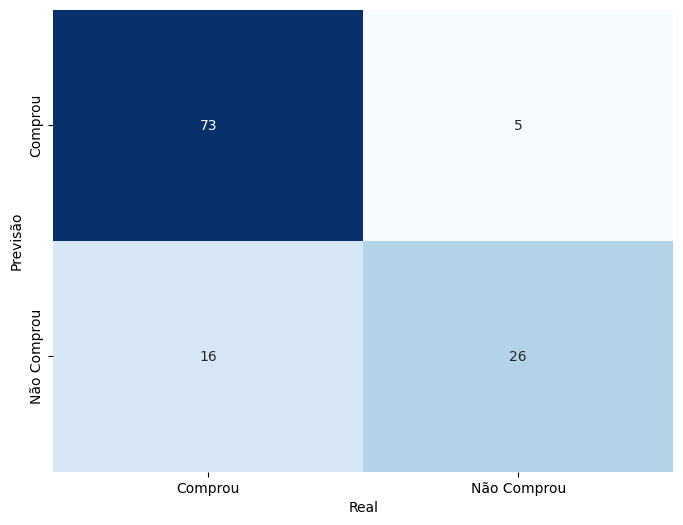

In [30]:
plt.figure(figsize=(8,6)) # define o tamanho da figura
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False,xticklabels=['Comprou','Não Comprou'],
            yticklabels=['Comprou','Não Comprou'])
plt.xlabel('Real')
plt.ylabel('Previsão')

In [35]:
# Aplicando a transformação nos dados
X = df.iloc[:,[2,3]].values
y = df.iloc[:,-1].values
# Divide a base de dados
X_treino,X_teste,y_treino,y_teste=train_test_split(X,y,test_size=0.25,random_state=3)
# Padronização dos dados
sc =StandardScaler()
X_treino=sc.fit_transform(X_treino)
X_teste= sc.fit_transform(X_teste)
algoritmo = SVC(kernel='linear',random_state=3)
algoritmo.fit(X_treino,y_treino)
#Previsão dos resultados
algoritmo.predict(X_teste)
# Inversão dos dados para teste
X_teste_inverse = sc.inverse_transform(X_teste)
# Visualização dos resultados dos dados de teste
plt.figure(figsize=(10,6))
# Pontos para as duas classes
plt.scatter(X_teste_inverse[y_prev==0,0],X_teste_inverse[y_prev==0,1],c='red',label='Não compra')
plt.scatter(X_teste_inverse[y_prev==1,0],X_teste_inverse[y_prev==1,1],c='blue',label='Compra')
plt.title('SVM -Dados de teste')
plt.xlabel('Idade')
plt.ylabel('Salário Anual Estimado')
plt.legend()
plt.show()

IndexError: boolean index did not match indexed array along axis 0; size of axis is 100 but size of corresponding boolean axis is 120

<Figure size 1000x600 with 0 Axes>